In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


In [9]:
sns.set(rc={"figure.figsize": (10, 5)})
plt.style.use("fivethirtyeight")

In [10]:
data = pd.read_csv("data/rdd_data.csv")
data.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,...,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure
0,5,0,0,0,10,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1442.30,$ 4.0,66.93,30,0.0,MA,19
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,883.96,$ 2.0,41.33,30,1.0,MG,20
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,4900.67,$ 224.0,15.88,29,0.0,RJ,21
3,0,0,0,0,0,0.0,25,25.0,0.0,25.0,...,0.0,0.0,0.0,1547.48,$ 1.0,74.99,36,1.0,BA,18
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1335.23,$ 13.0,52.41,37,0.0,PB,19


In [11]:
data.dtypes[data.dtypes == object]

discount_df = data["discount"].str.split(" ", expand=True)
discount_df[0].value_counts()

clean_df = data.copy()
clean_df["discount"] = pd.to_numeric(discount_df[1])

clean_df.dtypes[-10:]


clean_df.isna().any()[clean_df.isna().any() == True]
clean_df[clean_df["gender"].isna()]

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,...,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure
9,0,0,0,0,0,0.0,0,0.0,1331.979977,0.0,...,0.0,0.0,0.0,9740.33,444.0,33.28,33,NaN,PA,22
29,0,0,0,0,0,0.0,0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1846.01,38.0,52.40,40,NaN,PA,17
53,0,0,0,0,0,0.0,0,0.0,0.000000,0.0,...,0.0,0.0,0.0,24016.26,1058.0,119.03,34,NaN,MG,21
64,0,0,0,0,0,0.0,0,0.0,0.000000,0.0,...,0.0,0.0,0.0,5868.49,241.0,46.61,47,NaN,TO,20
67,0,0,0,0,0,0.0,25,0.0,25.000000,0.0,...,0.0,0.0,0.0,5036.91,225.0,21.42,33,NaN,RJ,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9935,0,0,0,0,0,0.0,25,75.0,25.000000,0.0,...,0.0,0.0,0.0,1316.35,6.0,58.19,29,NaN,MT,22
9957,0,0,0,0,0,0.0,0,0.0,0.000000,0.0,...,0.0,0.0,0.0,988.65,4.0,43.94,30,NaN,CE,19
9960,0,0,0,0,0,0.0,25,25.0,0.000000,0.0,...,0.0,0.0,0.0,1739.39,8.0,77.52,39,NaN,SP,21
9989,0,0,0,0,0,0.0,0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1670.70,2.0,79.76,31,NaN,CE,15


1000 rows where the gender column has missign values. At this stage, we highlight it but do not remove any rows.

# Finding Running Variables

In [12]:
clean_df.columns

Index(['spend_1m_baby', 'spend_2m_baby', 'spend_3m_baby', 'spend_4m_baby',
       'spend_5m_baby', 'spend_6m_baby', 'spend_1m_clothes',
       'spend_2m_clothes', 'spend_3m_clothes', 'spend_4m_clothes',
       'spend_5m_clothes', 'spend_6m_clothes', 'spend_1m_health',
       'spend_2m_health', 'spend_3m_health', 'spend_4m_health',
       'spend_5m_health', 'spend_6m_health', 'spend_1m_pet', 'spend_2m_pet',
       'spend_3m_pet', 'spend_4m_pet', 'spend_5m_pet', 'spend_6m_pet',
       'spend_1m_groceries', 'spend_2m_groceries', 'spend_3m_groceries',
       'spend_4m_groceries', 'spend_5m_groceries', 'spend_6m_groceries',
       'spend_1m_eletronic', 'spend_2m_eletronic', 'spend_3m_eletronic',
       'spend_4m_eletronic', 'spend_5m_eletronic', 'spend_6m_eletronic',
       'sales', 'discount', 'profit', 'age', 'gender', 'cust_state', 'tenure'],
      dtype='object')

<Axes: xlabel='age', ylabel='discount'>

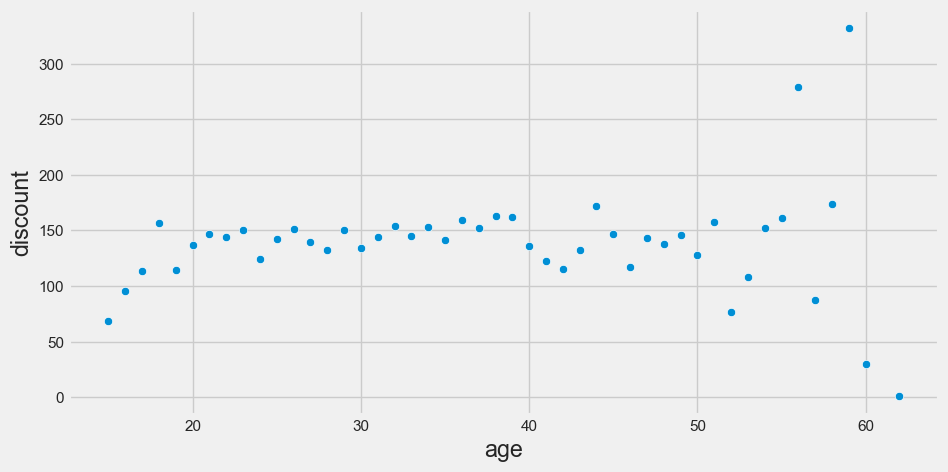

In [13]:
def group_rdd(groub_by: str):
    discount_by_group = (
        clean_df
            .groupby(groub_by)
            .aggregate({"discount": "mean"})
            .reset_index()
    )
    return discount_by_group

discount_by_age = group_rdd("age")

sns.scatterplot(
    data=discount_by_age,
    x="age",
    y="discount",
)


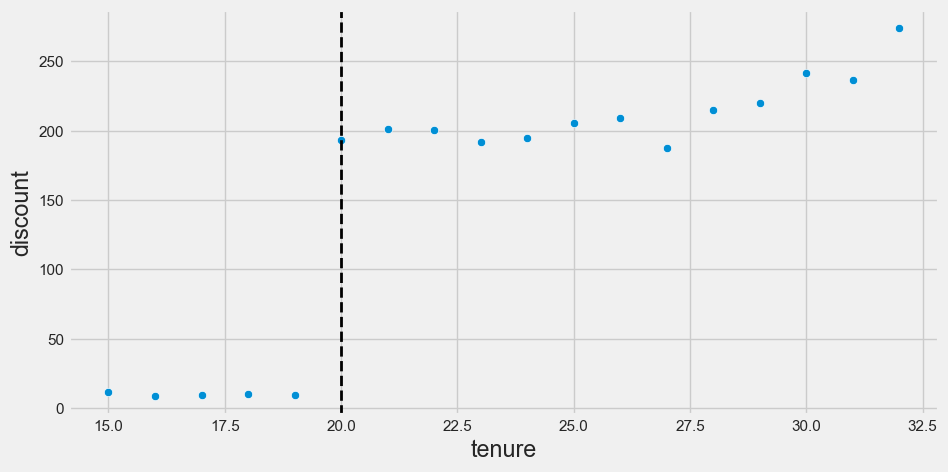

In [14]:
discount_by_tenure = group_rdd("tenure")
sns.scatterplot(
    data=discount_by_tenure,
    x="tenure",
    y="discount",
)

plt.axvline(x=20, linestyle="--", linewidth=2, color="black")

There seems to be a discontinuity of treatment in tenure. If we check with the e-commerce company, they might tell us that this discontinuity is expected. The company gives discount bonus to customers that have been with them for a long time. More specifically, the company gives discounts once a customer has reached 20 months. This point is called the *discontinuity threshold*.

Let's see if the discontinuity in discounts translate to a discontinuity in sales.

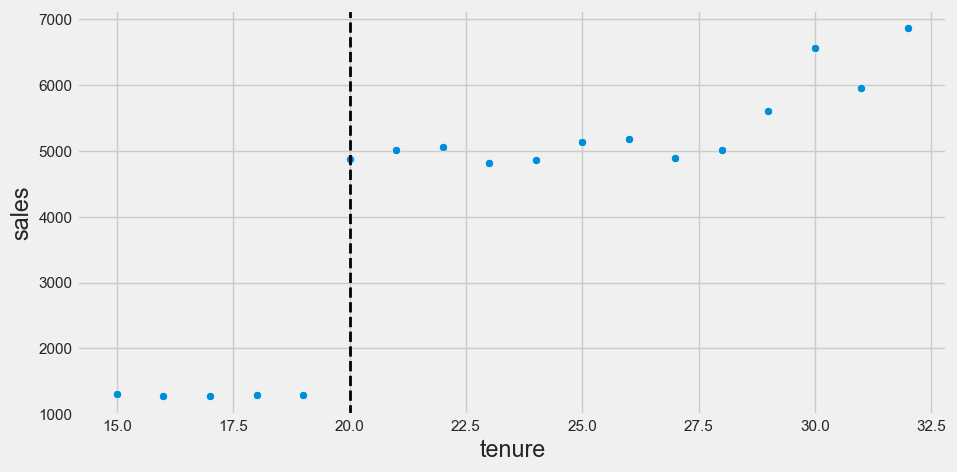

In [15]:
sales_by_tenure = (
    clean_df
        .groupby("tenure")
        .aggregate({"sales": "mean"})
        .reset_index()
)

sns.scatterplot(
    data=sales_by_tenure,
    x="tenure",
    y="sales",
)

plt.axvline(x=20, linestyle="--", linewidth=2, color="black")

The discontinuity transaltes to sales as well. We can leverage discontinuities if the customers at the right side of the threshold are comparable to the left. 


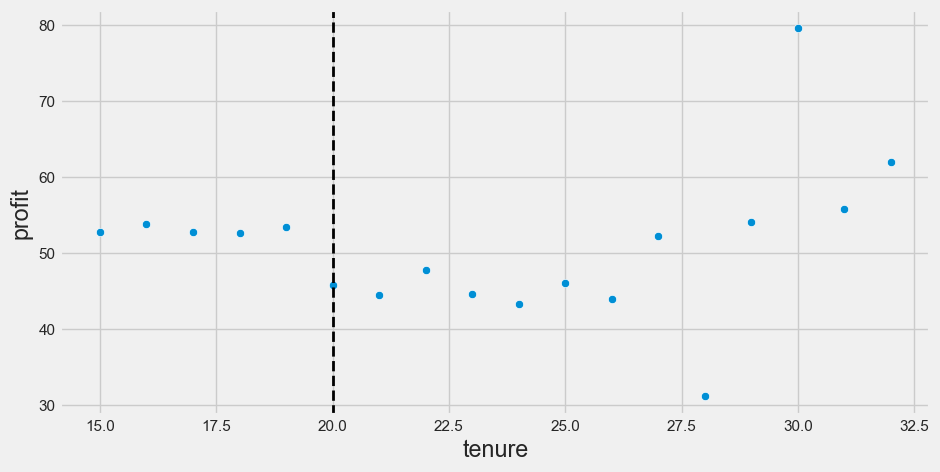

In [16]:
profit_by_tenure = (
    clean_df
        .groupby("tenure")
        .aggregate({"profit": "mean"})
        .reset_index()
)

sns.scatterplot(
    data=profit_by_tenure,
    x="tenure",
    y="profit",
)

plt.axvline(x=20, linestyle="--", linewidth=2, color="black")

Profits seem to decrease at the discontinuity. This probably indicates that the effect of discounts on profits is negative [something we saw in the first project].

# Checking for Bunching

An issue to be mindful of is whether customers can manipulate where they stand at the threshold i.e. if they can pretend to have 20 month tenure to bag the discount. In such cases, we tend to see a phenomenon called *bunching on the density of the running variable*. This means that we will have a lot of entities just above or just below the threshold.

<Axes: xlabel='tenure', ylabel='count'>

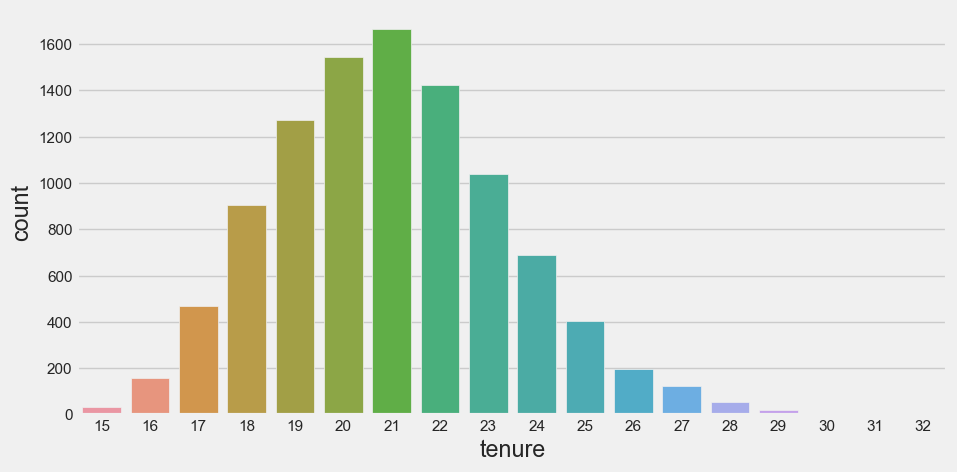

In [17]:
tenure_count = clean_df["tenure"].value_counts().reset_index()

sns.barplot(
    data=tenure_count,
    x="tenure",
    y="count",
)

The smoothness of the barplot suggest that there is no bunching.

# RDD Estimation

Next, we estimate the impact of discounts on profits using the discontinuity. The idea is to fit one regression line above the threshold and another one below the threshold. To do this, we construct an indicator column which is 1 when the running variable is above the threshold and 0 otherwise.Then, given the running variable $r$ we can estimate:

$$
y_i = \beta_0 + \beta_1 r_i + \beta_2 \bold I\{r_i > c\} + \beta_3 \bold I\{r_i > c\} r_i
$$

$\beta_0$ is the intercept of the regression below the threshold and $\beta_0 + \beta_1$ is the intercept for the regression above the threshold.

In [18]:
rdd_centered = clean_df.copy()
rdd_centered["tenure"] = rdd_centered["tenure"] - 19    # center tenure at zero
rdd_centered["above_threshold"] = (rdd_centered["tenure"] > 0).astype(int)

In [19]:
model = smf.ols("discount ~ tenure*above_threshold", data=rdd_centered).fit()
print(model.summary().tables[1])

                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 10.0302      4.213      2.381      0.017       1.771      18.290
tenure                     0.1118      3.263      0.034      0.973      -6.285       6.508
above_threshold          184.7626      5.696     32.436      0.000     173.597     195.928
tenure:above_threshold     0.8269      3.430      0.241      0.809      -5.896       7.550


After centering the regression and creating the dummy interaction, the threshold becomes zero. This causes the intercept $\beta_0$ to be the predicted value at the threshold, for the regression below it.

The model is telling us that the discount increases by 184.76 units once we cross the 19-month tenure threshold. This increase is also statistivcally significant.

In [20]:
tenure_grouped_df = (rdd_centered
                        .groupby("tenure")
                        .aggregate({"discount": "mean", "above_threshold": "mean"})
                        .reset_index()) 
tenure_grouped_df = tenure_grouped_df.assign(
    prediction = model.predict(tenure_grouped_df)
)

tenure_grouped_df

,tenure,discount,above_threshold,prediction
0,-4,11.606061,0.0,9.582855
1,-3,8.721519,0.0,9.694702
2,-2,9.633262,0.0,9.806550
3,-1,10.313053,0.0,9.918397
4,0,9.882168,0.0,10.030244
5,1,193.134067,1.0,195.731588
6,2,201.152553,1.0,196.670351
7,3,200.239635,1.0,197.609115
8,4,191.514947,1.0,198.547879
9,5,194.991266,1.0,199.486642


/Users/gregorytomy/miniconda3/envs/causal/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gregorytomy/miniconda3/envs/causal/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gregorytomy/miniconda3/envs/causal/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gregorytomy/miniconda3/envs/causal/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

Text(0.5, 1.0, 'Regression Discontinuity')

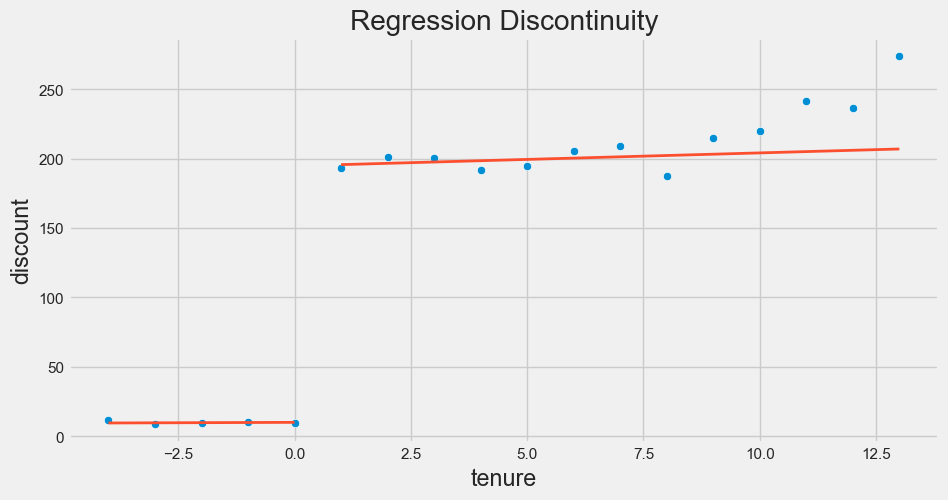

In [21]:
ax = sns.scatterplot(
    data=tenure_grouped_df,
    x="tenure",
    y="discount",
)
sns.lineplot(
    data=tenure_grouped_df.query("above_threshold > 0"),
    x="tenure",
    y="prediction",
    ax=ax,
    color="C1",
    lw=2,
)

sns.lineplot(
    data=tenure_grouped_df.query("above_threshold<=0"),
    x="tenure",
    y="prediction",
    ax=ax,
    color="C1",
    lw=2,
)
plt.title("Regression Discontinuity")

                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 53.1927      1.208     44.046      0.000      50.825      55.560
tenure                     0.1294      0.935      0.138      0.890      -1.704       1.963
above_threshold           -7.6015      1.633     -4.656      0.000     -10.802      -4.401
tenure:above_threshold    -0.1608      0.983     -0.164      0.870      -2.088       1.766


/Users/gregorytomy/miniconda3/envs/causal/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gregorytomy/miniconda3/envs/causal/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gregorytomy/miniconda3/envs/causal/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gregorytomy/miniconda3/envs/causal/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

Text(0.5, 1.0, 'Regression Discontinuity')

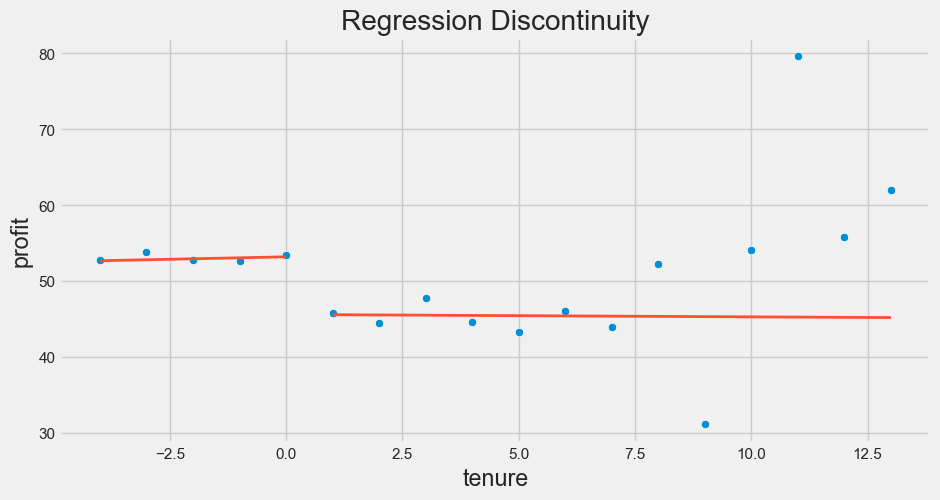

In [22]:
model_profit = smf.ols("profit ~ tenure*above_threshold", data=rdd_centered).fit()
print(model_profit.summary().tables[1])

tenure_grouped_df_2 = (rdd_centered
                        .groupby("tenure")
                        .aggregate({"profit": "mean", "above_threshold":"mean"})
                        .reset_index())
tenure_grouped_df_2 = tenure_grouped_df_2.assign(
    prediction = model_profit.predict(tenure_grouped_df_2)
)


ax = sns.scatterplot(
    data=tenure_grouped_df_2,
    x="tenure",
    y="profit",
)
sns.lineplot(
    data=tenure_grouped_df_2.query("above_threshold > 0"),
    x="tenure",
    y="prediction",
    ax=ax,
    color="C1",
    lw=2,
)

sns.lineplot(
    data=tenure_grouped_df_2.query("above_threshold<=0"),
    x="tenure",
    y="prediction",
    ax=ax,
    color="C1",
    lw=2,
)
plt.title("Regression Discontinuity")

As we can see, the treatment effect of discount on proft is negative. This is a statistically significant difference. Since crossing the threshold increases discount by about 184 and decreases profits by 7.6, we should expect that each \$ spent in discount decreases profits by about 4 cents. 

# Kernel Weights

RDD relies heavily on the extrapolation powers of regression. That is, we have to fit the edge of the regression line, close to the discontinuity, much better than the other points. This is difficult in cases where the data has weird nonlinearities or is denser in regions away from the threshold. In these cases, we can end up with a poor fit around the threshold and a biased estimator of the treatment effect.

One way to solve this issue is to use a kernel to down weight samples that are far from the threshold. Kernel weighting works like a lens, focusing the power of regresion on the points that are close to the threshold and discarding the ones thar are further from threshold.

Let's define a triangular kernel function:
$$
K(R, c, h) = \bold I\{|R - c| \le h\} * \left(1 - \frac{|R-C|}{h}\right)
$$
where $R$ is the running variable, $c$ is a center parameter, and $h$ is a width parameter. The kernel is defined from $(c - h)$ to $(c + h)$

In [23]:
def triangular_kernel(R, c, h):
    indicator = (np.abs(R - c) <= h).astype(float)
    return indicator * (1 - (np.abs(R - c) / h))    # linearly decrease from 1 at the center to 0 at the edges

# test
triangular_kernel(np.array([1, 2, 3, 4, 5]), c=3, h=2)

array([0. , 0.5, 1. , 0.5, 0. ])

<Axes: xlabel='tenure', ylabel='kernel_values'>

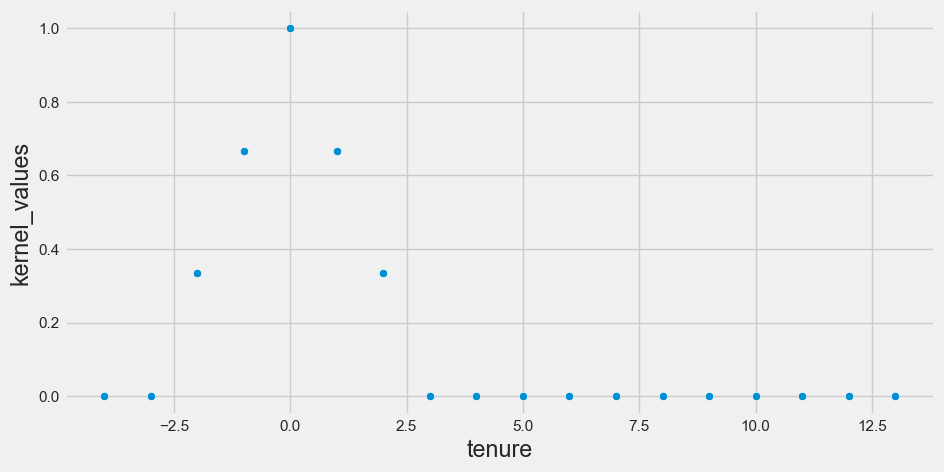

In [24]:
# rdd_centered["kernel_values"] = rdd_centered["tenure"].apply(lambda x: triangular_kernel(x, c=0, h=3))

all_tenures = np.array(sorted(rdd_centered["tenure"].unique()))
all_tenures

kernel_values = triangular_kernel(all_tenures, c=0, h=3)

plot_df = pd.DataFrame({
    "tenure" : all_tenures,
    "kernel_values": kernel_values,
})

sns.scatterplot(
    data=plot_df,
    x="tenure",
    y="kernel_values",)

In [25]:
rdd_centered["kernel_values_h3"] = rdd_centered["tenure"].apply(lambda x: triangular_kernel(x, c=0, h=3))
# rdd_centered["kernel_values_h2"] = rdd_centered["tenure"].apply(lambda x: triangular_kernel(x, c=0, h=2))
rdd_centered["kernel_values_h4"] = rdd_centered["tenure"].apply(lambda x: triangular_kernel(x, c=0, h=4))

# kernel_model_h2 = smf.wls(
#     "profit ~ tenure*above_threshold",
#     weights=rdd_centered["kernel_values_h2"],
#     data=rdd_centered
# ).fit()

kernel_model_h3 = smf.wls(
    "profit ~ tenure*above_threshold",
    weights=rdd_centered["kernel_values_h3"],
    data=rdd_centered
).fit()

kernel_model_h4= smf.wls(
    "profit ~ tenure*above_threshold",
    weights=rdd_centered["kernel_values_h4"],
    data=rdd_centered
).fit()

print(kernel_model_h3.summary().tables[1])
print(kernel_model_h4.summary().tables[1])

                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 53.3467      0.620     86.063      0.000      52.132      54.562
tenure                     0.4708      0.797      0.590      0.555      -1.092       2.034
above_threshold           -6.1449      1.826     -3.365      0.001      -9.724      -2.566
tenure:above_threshold    -1.8280      1.440     -1.269      0.204      -4.651       0.995
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 53.2882      0.742     71.858      0.000      51.835      54.742
tenure                     0.2974      0.788      0.377      0.706      -1.247       1.842
above_threshold           -8.3126      1.614     -5.151      0.000     -11.476      -5.149

/Users/gregorytomy/miniconda3/envs/causal/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:807: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))
/Users/gregorytomy/miniconda3/envs/causal/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:807: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


Once again we get a statistically significant negative impact of a discount on profits. When h=3, it is a little less that our previous model. We know we expect that each \$ spent in discount decreases profits by about 3 cents. But interestigly, when h=4, the negative impact is greater.

In [26]:
# tenure_grouped_df_2["prediction_kernel_h2"] = kernel_model_h2.predict(tenure_grouped_df_2)
tenure_grouped_df_2["prediction_kernel_h3"] = kernel_model_h3.predict(tenure_grouped_df_2)
tenure_grouped_df_2["prediction_kernel_h4"] = kernel_model_h4.predict(tenure_grouped_df_2)
tenure_grouped_df_2

,tenure,profit,above_threshold,prediction,prediction_kernel_h3,prediction_kernel_h4
0,-4,52.723939,0.0,52.675241,51.463660,52.098805
1,-3,53.821772,0.0,52.804595,51.934423,52.396156
2,-2,52.782111,0.0,52.933949,52.405186,52.693506
3,-1,52.680398,0.0,53.063303,52.875949,52.990857
4,0,53.393001,0.0,53.192657,53.346712,53.288208
5,1,45.844495,1.0,45.559711,45.844495,45.378963
6,2,44.487213,1.0,45.528291,44.487213,45.782313
7,3,47.701012,1.0,45.496872,43.129932,46.185663
8,4,44.601138,1.0,45.465452,41.772650,46.589013
9,5,43.279330,1.0,45.434032,40.415368,46.992363


/Users/gregorytomy/miniconda3/envs/causal/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gregorytomy/miniconda3/envs/causal/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gregorytomy/miniconda3/envs/causal/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gregorytomy/miniconda3/envs/causal/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

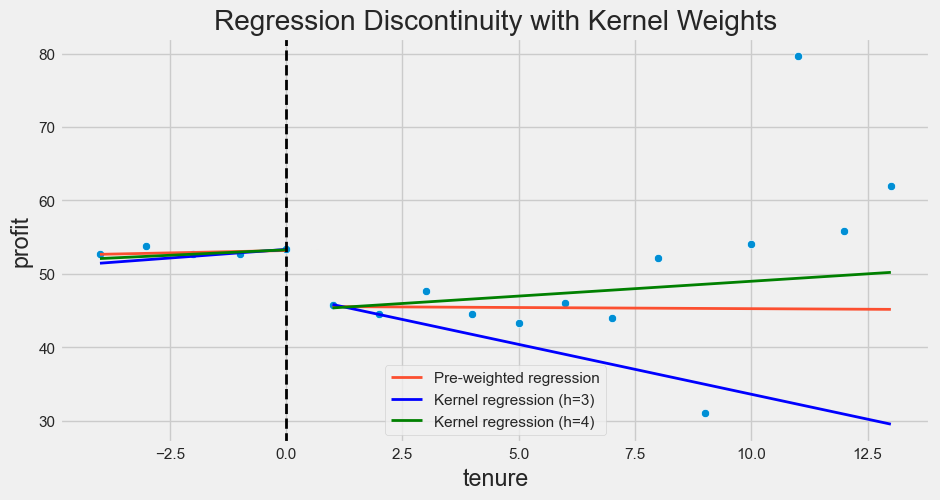

In [27]:

ax = sns.scatterplot(
    data=tenure_grouped_df_2,
    x="tenure",
    y="profit",
)

# pre-weighted regression
sns.lineplot(
    data=tenure_grouped_df_2.query("above_threshold > 0"),
    x="tenure",
    y="prediction",
    ax=ax,
    color="C1",
    lw=2,
    label="Pre-weighted regression"
)

sns.lineplot(
    data=tenure_grouped_df_2.query("above_threshold<=0"),
    x="tenure",
    y="prediction",
    ax=ax,
    color="C1",
    lw=2,
)

# kernel regression (with c=0, h=3)
sns.lineplot(
    data=tenure_grouped_df_2.query("above_threshold > 0"),
    x="tenure",
    y="prediction_kernel_h3",
    ax=ax,
    color="blue",
    lw=2,
)

sns.lineplot(
    data=tenure_grouped_df_2.query("above_threshold<=0"),
    x="tenure",
    y="prediction_kernel_h3",
    ax=ax,
    color="blue",
    lw=2,
    label="Kernel regression (h=3)"
)

# kernel regression (with c=0, h=4)
sns.lineplot(
    data=tenure_grouped_df_2.query("above_threshold > 0"),
    x="tenure",
    y="prediction_kernel_h4",
    ax=ax,
    color="green",
    lw=2,
)

sns.lineplot(
    data=tenure_grouped_df_2.query("above_threshold<=0"),
    x="tenure",
    y="prediction_kernel_h4",
    ax=ax,
    color="green",
    lw=2,
    label="Kernel regression (h=4)"
)
plt.axvline(x=0, linestyle="--", linewidth=2, color="black")
plt.title("Regression Discontinuity with Kernel Weights")
plt.legend()
# plt.savefig("images/rdd_kernel.jpg")

Playing with the width parameter of the kernel can change the regression line by a lot. The lower the width, the less we consider points far from the threshold. 